### Objective 
This module aims to evaluate and compare the performance of various classification models trained on the dataset eeg.csv 

In [1]:
from dataloader import data_info, train_val_test_split_data,get_x_y, data_visuals
from classifiers import Classifier
from evaluation import evaluate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Data Visualisation
Data visualization is the presentation of data in a pictorial or graphical format that enables to see analytics presented visually, so that difficult concepts or new patterns can be identified easily.

In [2]:
# obtaining x, y for the dataset
x, y = get_x_y()

In [3]:
#Viewing the dataset
data_info()


First 5 rows of datasets: 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1



Last 5 rows of datasets: 


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
14971,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,2
14972,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,2
14973,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,2
14974,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,2
14975,4287.69,3997.44,4260.00,4121.03,4333.33,4616.41,4088.72,4638.46,4212.31,4226.67,4167.69,4274.36,4597.95,4350.77,2



Description of each column: 



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,Class
count,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000,14976.000000
mean,4301.378607,4009.507626,4264.083569,4122.377696,4341.561287,4620.060675,4072.823013,4615.788517,4201.341742,4231.202968,4202.150055,4279.089914,4606.009665,4361.304558,1.448851
std,37.770271,30.087356,21.335365,20.929477,17.007343,18.517252,20.910175,18.341333,17.841047,19.765889,24.475270,20.093956,33.405176,38.472996,0.497394
min,4197.950000,3905.640000,4197.440000,4058.460000,4304.620000,4566.150000,4026.150000,4567.180000,4147.690000,4152.820000,4100.000000,4201.030000,4443.080000,4205.640000,1.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,1.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,1.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,2.000000
max,4504.100000,4156.920000,4386.150000,4250.260000,4463.590000,4756.920000,4178.460000,4731.790000,4320.000000,4362.560000,4332.310000,4397.950000,4833.850000,4573.330000,2.000000



Information of each column: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14976 entries, 0 to 14975
Data columns (total 15 columns):
V1       14976 non-null float64
V2       14976 non-null float64
V3       14976 non-null float64
V4       14976 non-null float64
V5       14976 non-null float64
V6       14976 non-null float64
V7       14976 non-null float64
V8       14976 non-null float64
V9       14976 non-null float64
V10      14976 non-null float64
V11      14976 non-null float64
V12      14976 non-null float64
V13      14976 non-null float64
V14      14976 non-null float64
Class    14976 non-null int64
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


None


Checking for null values: 

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
Class    0
dtype: int64


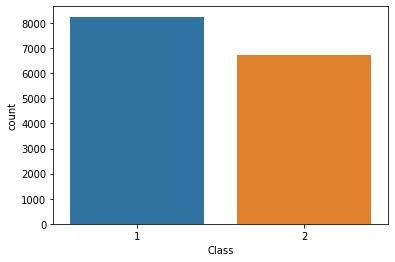

In [4]:
# checking the values of Class column 
data_visuals()

20% of testing data is considered satisfactory amout given we have enough data for training and validation.
This dataset has a total of 15,000 samples(approx), 60% of which is enough to train the model.

In [22]:
# Splitting data into training, validation and testing sets
x_train, x_val, x_test, y_train, y_val, y_test = train_val_test_split_data(0.20) 

### Evaluating the performance of various Classifier Models
After training a model, it is important to see how well does it perform on an unseen dataset, so that further improvements can be made to it. <br>
This can be done by measuring various evaluation mettrics such as : 
* Accuracy
* Precision
* Recall
* f1 Score
* Confusion Matrix
* Lift and Gain Charts
* AUC-ROC Curves
* Validation curves, indicating - high bias or high variance

In [6]:
# Creating a dataframe to record the performance
columns = ['Model','Accuracy', 'Precision', 'Recall', 'F1 score']
df = pd.DataFrame(columns = columns)

* ##### Gaussain Naive Bayes
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. It is easy to build and particularly useful for very large data sets.

Accuracy :  0.6047579298831386
Precision:  0.6841584158415842
Recall:  0.5238817285822593
F1 score :  0.5933877200515243
Confusion Matrix
[[691 628]
 [319 758]]


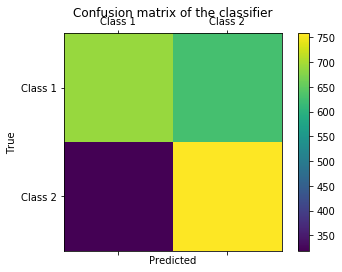

In [7]:
# using Gaussian Bayes 
model = Classifier() 
classifier = model.Gaussian(x_train,y_train)
model.evaluation(classifier,x_val, y_val)

accuracy , precision, recall, f1, _ = evaluate(classifier, x_val, y_val)
df = df.append({'Model':'Gaussian','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1 score':f1}, ignore_index=True)

* ##### K Neighbours Classifier
It is a supervised classifier, which takes a bunch of labelled points and uses them to learn the clusters of other labeled points, wrt to thier degree of closeness using mathematical functions.

Accuracy :  0.9599332220367279
Precision:  0.9615094339622642
Recall:  0.9658832448824868
F1 score :  0.9636913767019668
Confusion Matrix
[[1274   45]
 [  51 1026]]


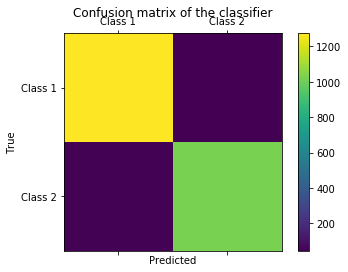

In [8]:
# K- Neighbours Classifier
classifier = model.KNeighbors(x_train,y_train)
model.evaluation(classifier,x_val, y_val)

accuracy , precision, recall, f1, _ = evaluate(classifier, x_val, y_val)
df = df.append({'Model':'K-Neighbors','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1 score':f1}, ignore_index=True)

* ##### Logistic Regression 
It is a classification model that takes some input and calculates the probabilty of the outcome using mathematical functions like sigmoid and ReLu.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy :  0.6552587646076795
Precision:  0.6637873754152824
Recall:  0.7573919636087946
F1 score :  0.7075070821529745
Confusion Matrix
[[999 320]
 [506 571]]


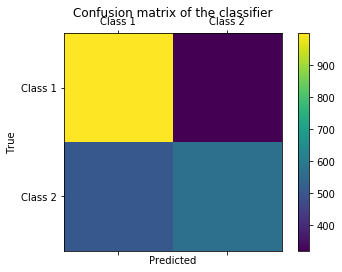

In [9]:
# Logistic Regression 
classifier = model.Logistic_Reg(x_train,y_train)
model.evaluation(classifier,x_val, y_val)

accuracy , precision, recall, f1, _ = evaluate(classifier, x_val, y_val)
df = df.append({'Model':'Logistic Reg','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1 score':f1}, ignore_index=True)

* ##### Random Forest Classifier
It is a way to make a decision by dividing the inputs into smaller decisions, with some degree randomness.The group outcomes are based on the positive responses. 
Used in Recommendation Systems.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy :  0.8889816360601002
Precision:  0.8684394681595521
Recall:  0.9408642911296436
F1 score :  0.9032023289665211
Confusion Matrix
[[1241   78]
 [ 188  889]]


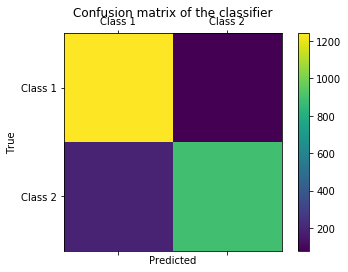

In [10]:
# Random Forest Classifier
classifier = model.Random_Forest(x_train,y_train)
model.evaluation(classifier,x_val, y_val)

accuracy , precision, recall, f1, _ = evaluate(classifier, x_val, y_val)
df = df.append({'Model':'Random Forest','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1 score':f1}, ignore_index=True)

* ##### Decision Tree Classifier
It is a classifier that makes use of the mechanical way to make a decision by dividing the inputs into smaller decisions.

Accuracy :  0.8234557595993323
Precision:  0.8419847328244274
Recall:  0.8362395754359363
F1 score :  0.8391023202738684
Confusion Matrix
[[1103  216]
 [ 207  870]]


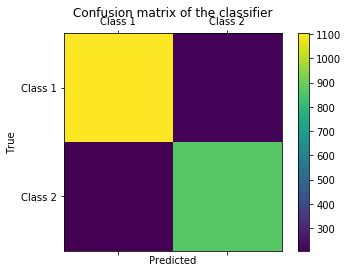

In [11]:
# Decision Tree Classifier

classifier = model.Decision_Tree(x_train,y_train)
model.evaluation(classifier,x_val, y_val)

accuracy , precision, recall, f1, _ = evaluate(classifier, x_val, y_val)
df = df.append({'Model':'Decision Tree','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1 score':f1}, ignore_index=True)

* ##### Support Vector Machine 
It is a supervised classifier, which makes use of powerful learning algorithms for complex non-linear functions. It classifies the datapoints based on a decision boundary.

Accuracy :  0.5505008347245409
Precision:  0.5505008347245409
Recall:  1.0
F1 score :  0.7100942126514131
Confusion Matrix
[[1319    0]
 [1077    0]]


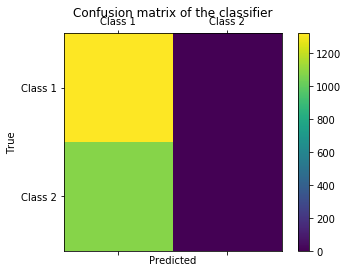

In [12]:
# Support Vector Machine Classifier
classifier = model.svm_classifier(x_train,y_train)
model.evaluation(classifier,x_val, y_val)

accuracy , precision, recall, f1, _ = evaluate(classifier, x_val, y_val)
df = df.append({'Model':'SVM','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1 score':f1}, ignore_index=True)

### Comparing Model Performance
In this section the performance of each model will be compared, to identify the best model

In [13]:
df

,Model,Accuracy,Precision,Recall,F1 score
0,Gaussian,0.604758,0.684158,0.523882,0.593388
1,K-Neighbors,0.959933,0.961509,0.965883,0.963691
2,Logistic Reg,0.655259,0.663787,0.757392,0.707507
3,Random Forest,0.888982,0.868439,0.940864,0.903202
4,Decision Tree,0.823456,0.841985,0.836240,0.839102
5,SVM,0.550501,0.550501,1.000000,0.710094


##### Plotting a bar graph to compare the difference in model performance 

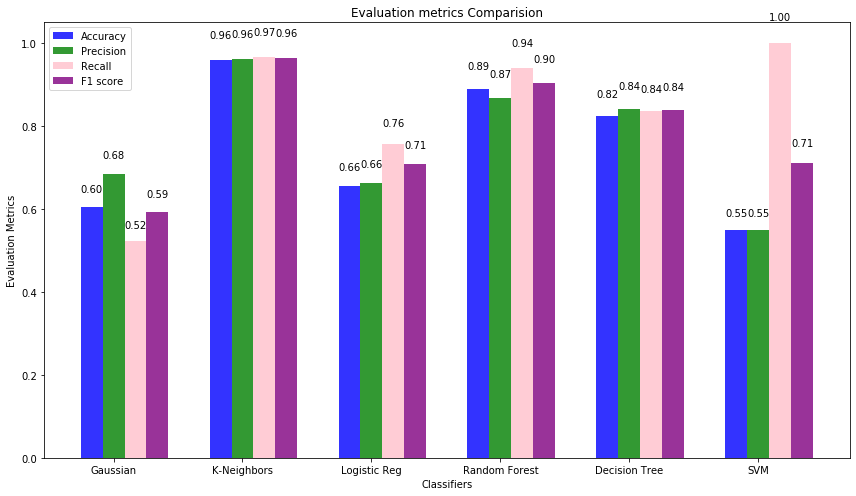

In [14]:
# number of models
n_groups = 6

# create plot
fig = plt.figure(figsize=(12,7)) 
ax = fig.add_subplot(111)
index = np.arange(n_groups)
bar_width = 0.17
opacity = 0.8

# rectangles for each evaluation metric

rects1 = plt.bar(index, df.Accuracy, bar_width,
alpha=opacity,
color='blue',
label='Accuracy')

rects2 = plt.bar(index + bar_width, df.Precision, bar_width,
alpha=opacity,
color='green',
label='Precision')

rects3 = plt.bar(index + 2*bar_width, df.Recall, bar_width,
alpha=opacity,
color='pink',
label='Recall')

rects4 = plt.bar(index + 3*bar_width, df['F1 score'], bar_width,
alpha=opacity,
color='purple',
label='F1 score')

# function to attach values to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,'%.2f' % height,ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.xlabel('Classifiers')
plt.ylabel('Evaluation Metrics')
plt.title('Evaluation metrics Comparision')
plt.xticks(index + bar_width, (df.Model))
plt.legend()

plt.tight_layout()
plt.show()

from the above graph we can say that K-Neighbors Classifier has the highest probability of giving the best results on an unseen dataset.

### K-NN model - Final Evaluation

In [20]:
# mixing training and validation sets
xt = x_train.append(x_val, ignore_index=True)
yt = y_train.append(y_val, ignore_index=True)

Accuracy :  0.9619492656875834
Precision:  0.9736684619988031
Recall:  0.9587507365939893
F1 score :  0.9661520190023752
Confusion Matrix
[[1627   70]
 [  44 1255]]


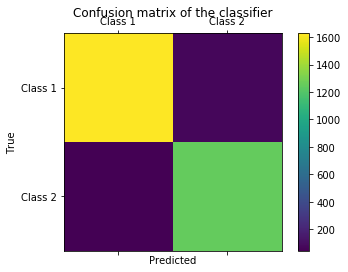

In [24]:
# training the model on complete trainining set-train, validation
clf = model.KNeighbors(xt, yt)
# evaluating the model on test set
model.evaluation(clf, x_test, y_test)

In [30]:
# calculate train err scores
train_err = (1-clf.score(x_train, y_train))*100
train_err

1.5964106844741255

In [33]:
# calculate test err scores
test_err = (1-clf.score(x_test, y_test))*100
test_err

3.8050734312416568

In [35]:
test_err-train_err

2.2086627467675313

**Interpretation :** 
* The test scores have improved from the validation scores by 0.2%.
* We see the *test error* is 2.21 % greater than the *validation error*, which is an indication of high variance and can be improved by :
    * Dropping some irrelevant feature columns.
    * Adding more data.
    * Adding regularization parameter.
    <br>*Note : such analysis is usually performed on the validation set, and the above stated measures applied.*